In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Central Tendency

In [2]:
from scipy.stats import skewnorm
np.random.seed(seed=1)
size=1000

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head()

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,0.979,0.091,-0.636,14.184,0.609,43.249,39.387,0,16
1,0.478,0.221,-1.041,46.976,0.886,38.776,30.270,1,17
2,-0.896,1.012,-1.096,3.593,0.582,38.944,42.032,4,10
3,-1.222,1.502,-0.653,0.529,0.307,37.854,38.704,1,20
4,-4.060,0.584,-0.509,2.998,0.745,41.731,33.956,1,17


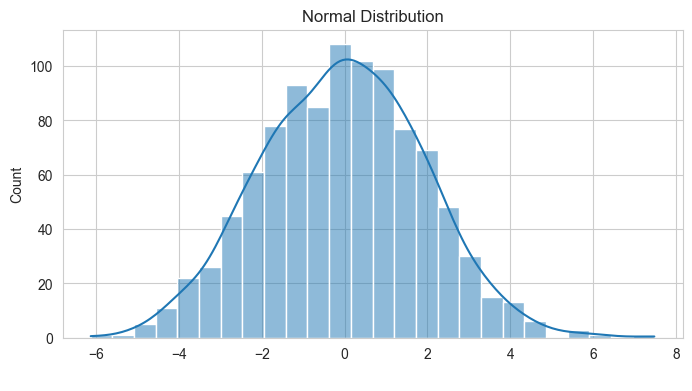

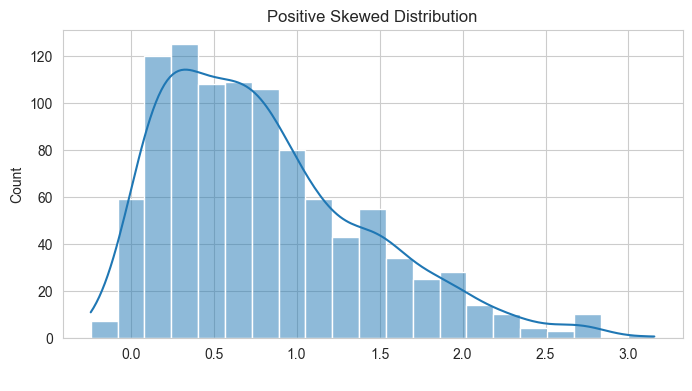

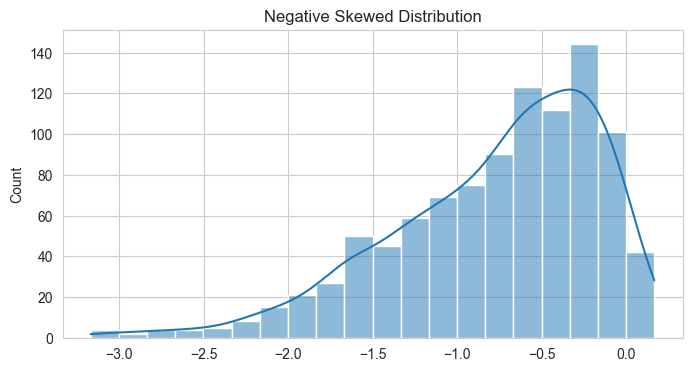

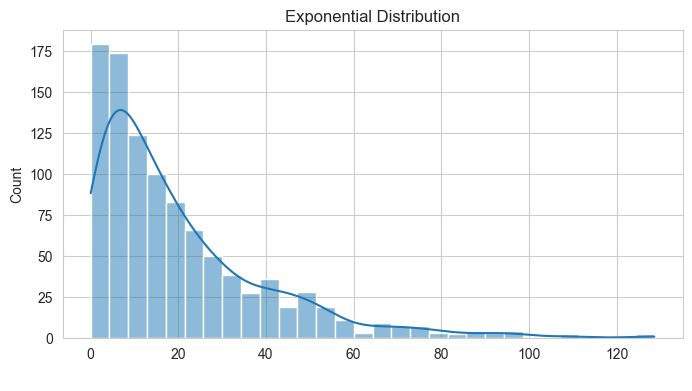

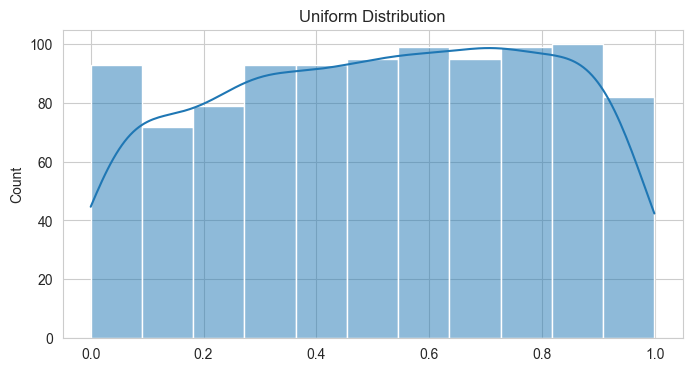

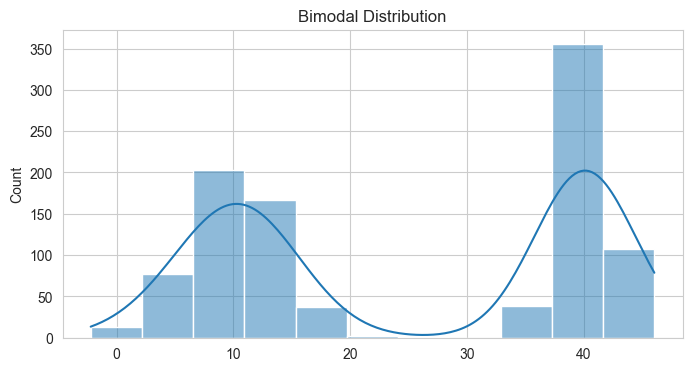

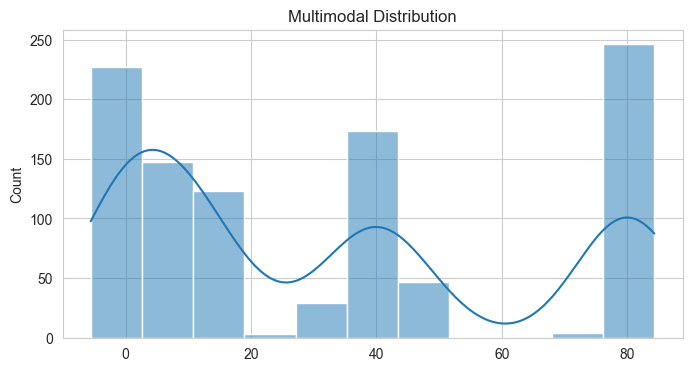

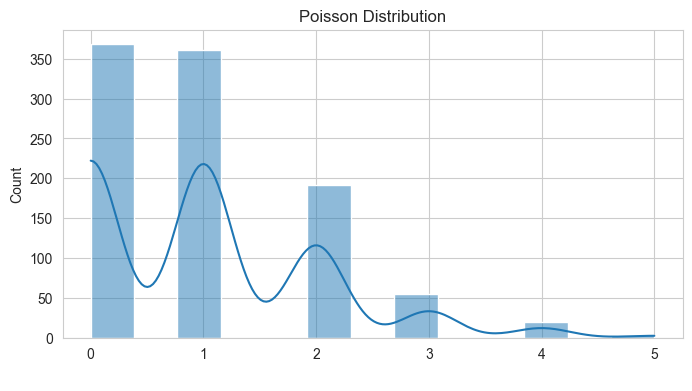

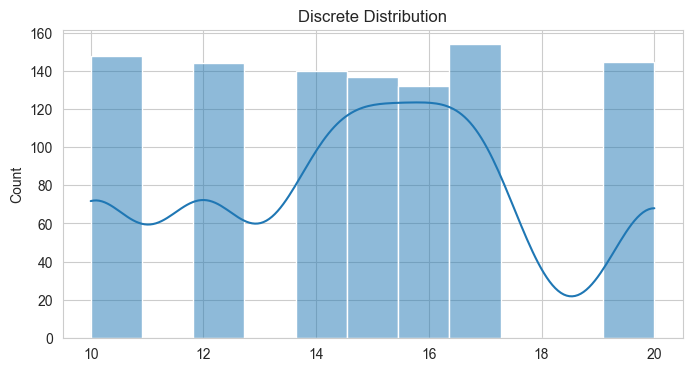

In [3]:
""" Plot the distributions of each column """
for col in df.columns: # loop through each column
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=col, kde=True) # plot histogram with KDE
  plt.title(f"{col} Distribution")
  plt.xlabel(" ")
  plt.show();
  print("\n\n")

Central tendency helps provide figures to summarise the data. We will start with:

* Mean
* Median
* Mode

# Mean
The **mean (average)** is the sum of all values divided by the number of observations. It is the **measure of the spread of the data around that sample**.
In Python (Pandas), you can calculate it with `.mean()` for each numerical column.

In [4]:
df.mean()

Normal             -0.044322
Positive Skewed     0.801536
Negative Skewed    -0.776990
Exponential        20.056794
Uniform             0.511605
Bimodal            25.101810
Multimodal         32.632432
Poisson             1.010000
Discrete           14.853000
dtype: float64

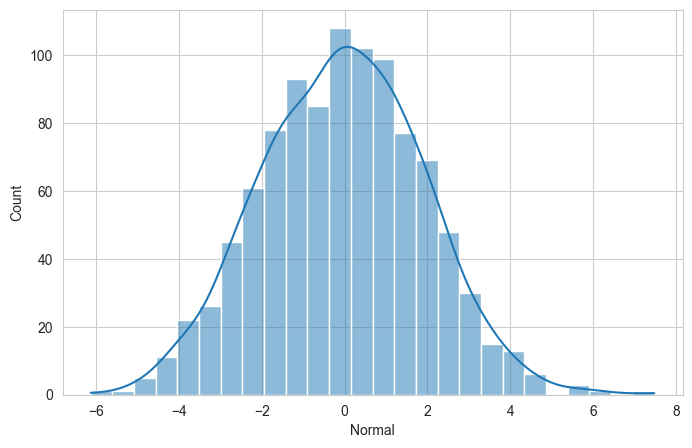

In [ ]:
""" Plot the distribution of the Normal column """
col = 'Normal'

plt.figure(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.show()

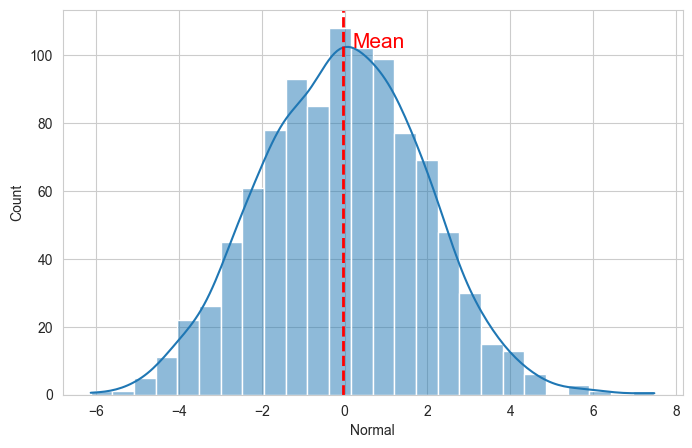

In [6]:
fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
# Create a red dashed vertical line at the mean value
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
# Label this red dashed line with 'Mean' offset to the right of the line
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')
plt.show()

The **mean is added to the histogram** to show where it lies.
* `plt.text()` is used to place a label for the mean.
* The **x-position** is set at the mean plus a small offset (to avoid overlap).
* The **offset** comes from a fraction of the standard deviation.
* For the **y-position**, the upper limit of the y-axis (`.get_ylim()[1]`) is used, then shifted down slightly (×0.9) for readability.

👉 In short: the code carefully positions the mean label so it’s visible and not cluttered.

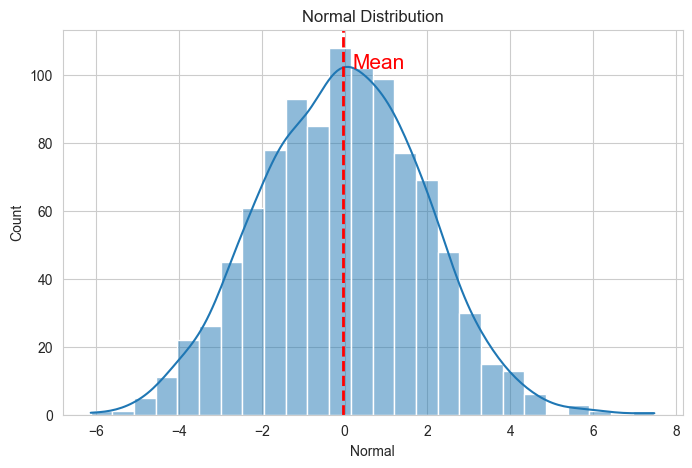

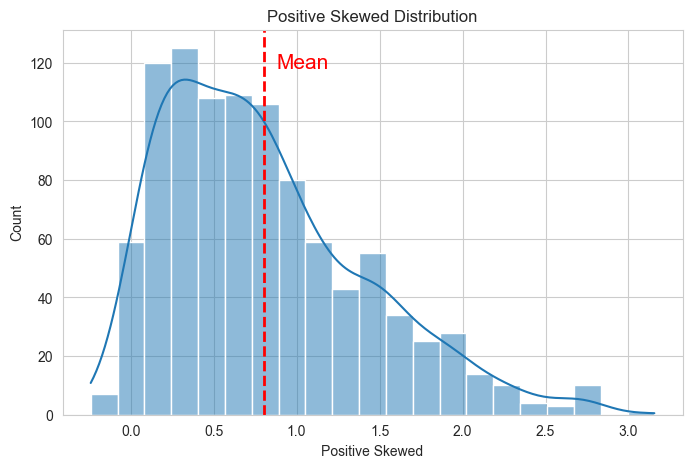

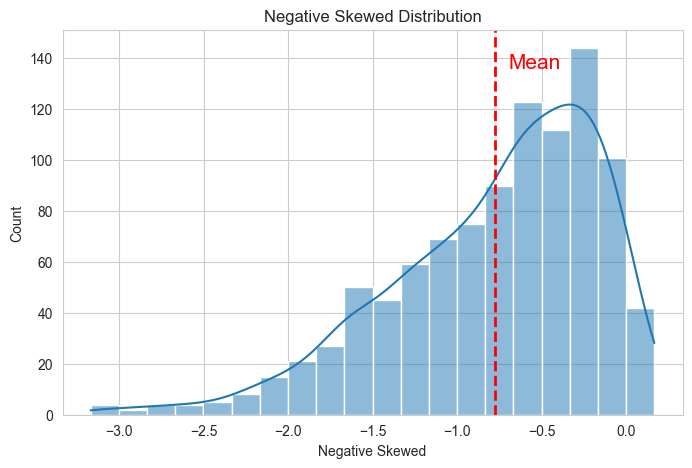

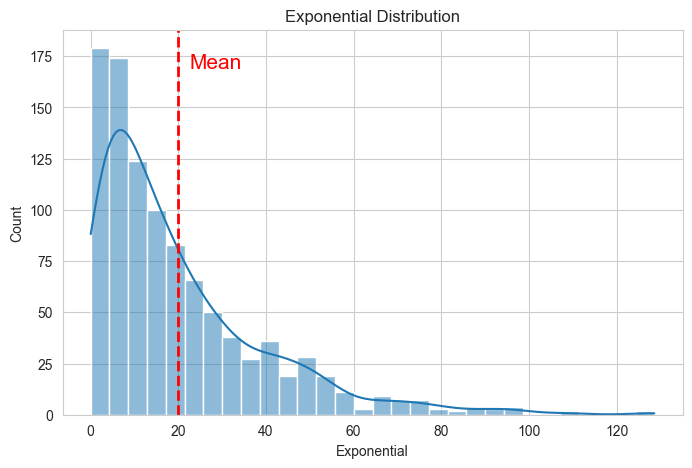

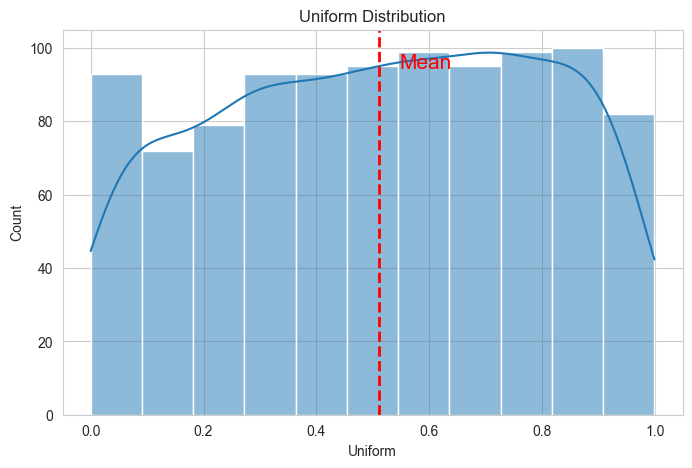

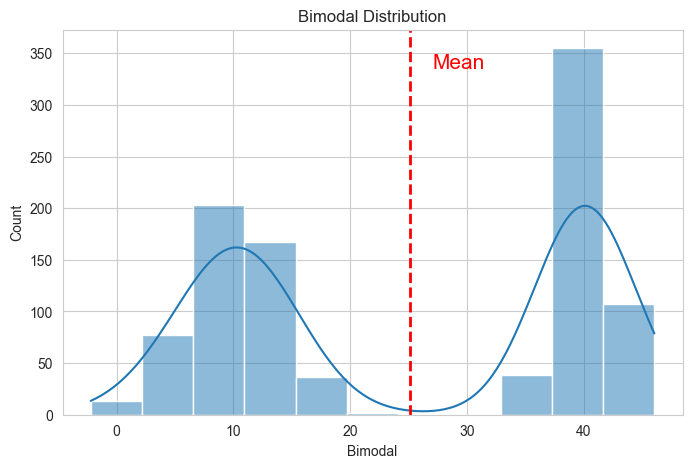

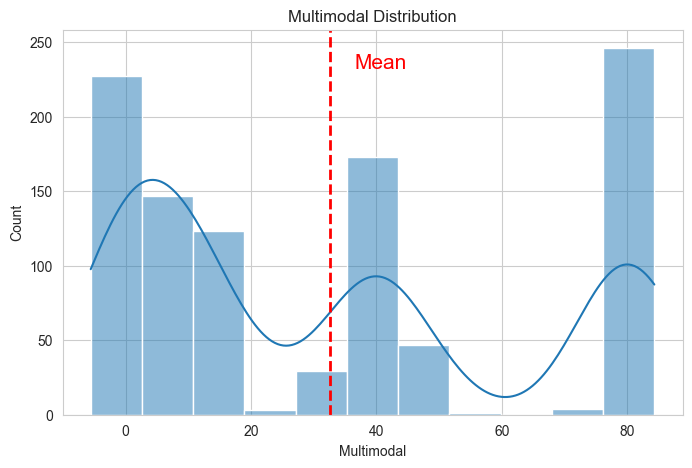

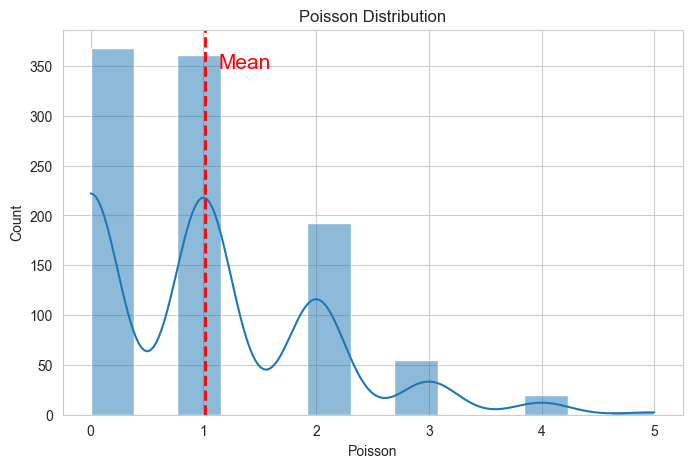

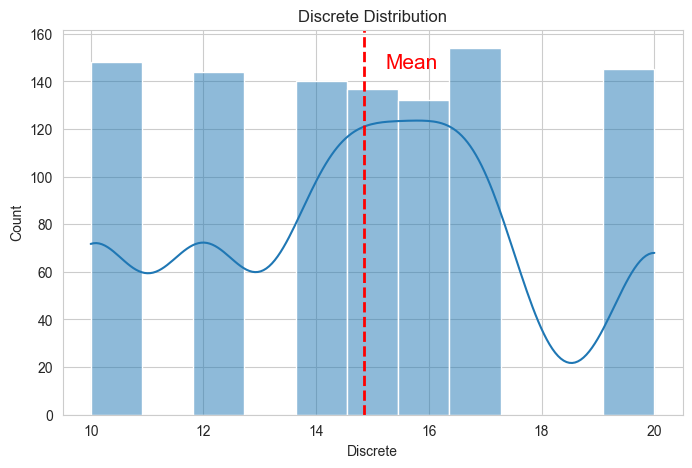

In [7]:
""" Plot the distributions of each column """
for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5)) 
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)
  # Create a red dashed vertical line at the mean value
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  # Label this red dashed line with 'Mean' offset to the right of the line
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')
  plt.show()
  print("\n")

# Median
The **median** splits data into two equal halves.
* Arrange values in order.
* If odd count → median is the middle value.
* If even count → median is the average of the two middle values.
* In Pandas, use `.median()` to calculate it for numerical columns.

In [8]:
df.median()

Normal             -0.0300
Positive Skewed     0.6860
Negative Skewed    -0.6375
Exponential        13.7660
Uniform             0.5225
Bimodal            30.1240
Multimodal         25.6245
Poisson             1.0000
Discrete           15.0000
dtype: float64

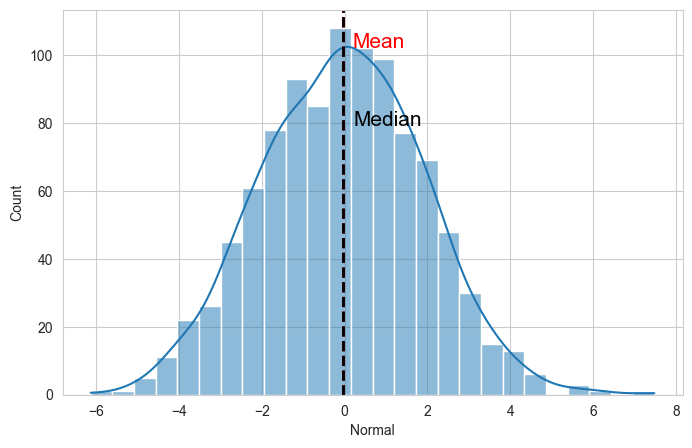

In [9]:
""" Plot the distribution of the Normal column with Mean and Median """
col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

# Create a red dashed vertical line at the mean value
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

# Create a black dashed vertical line at the median value
plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

plt.show()

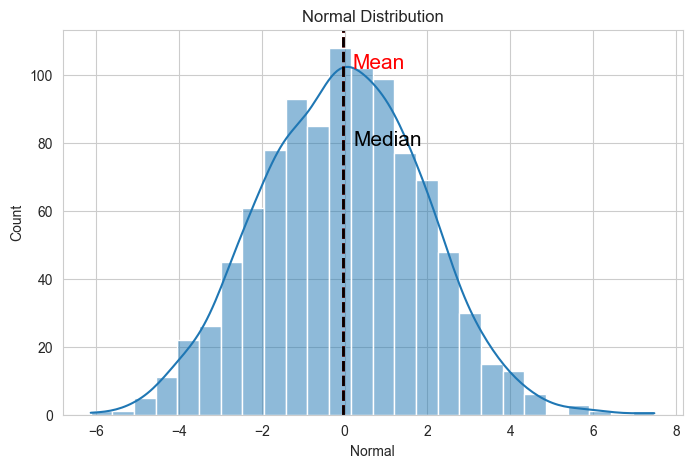

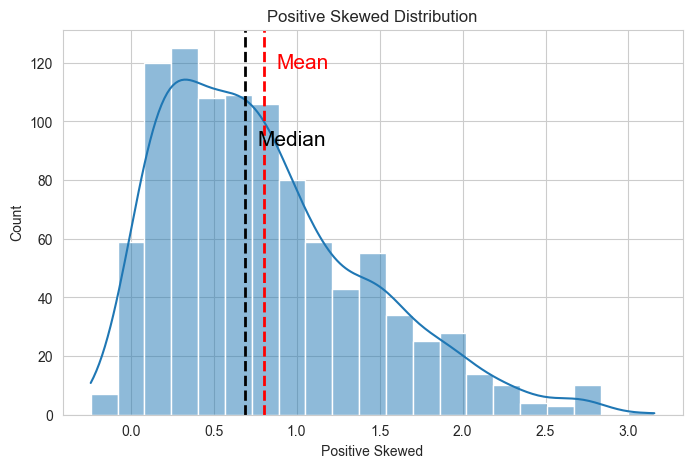

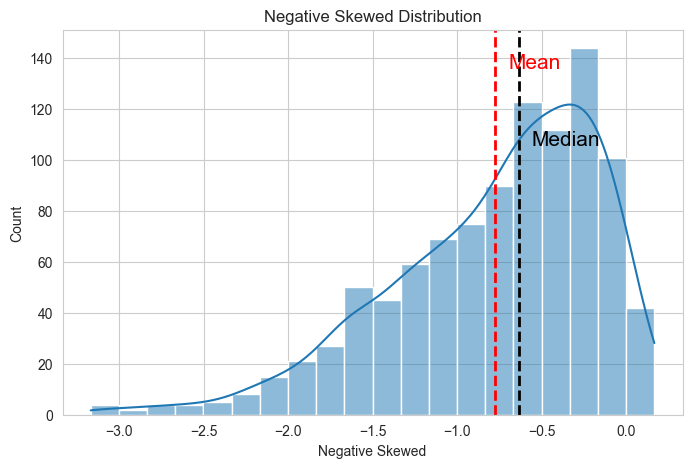

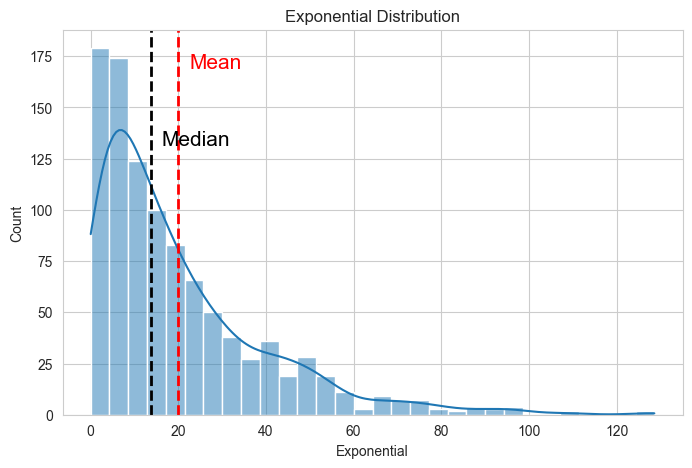

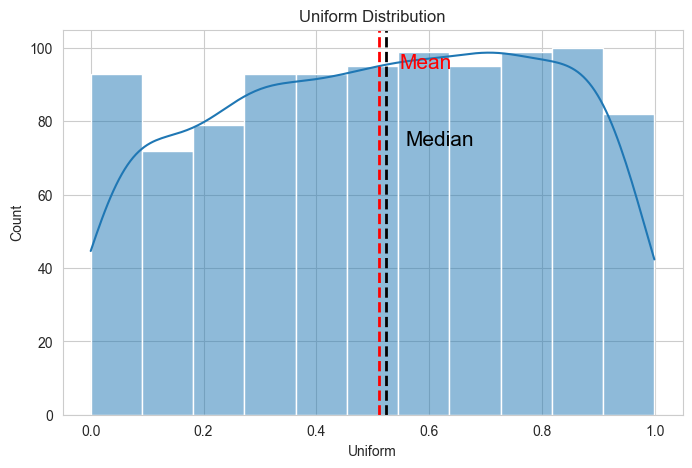

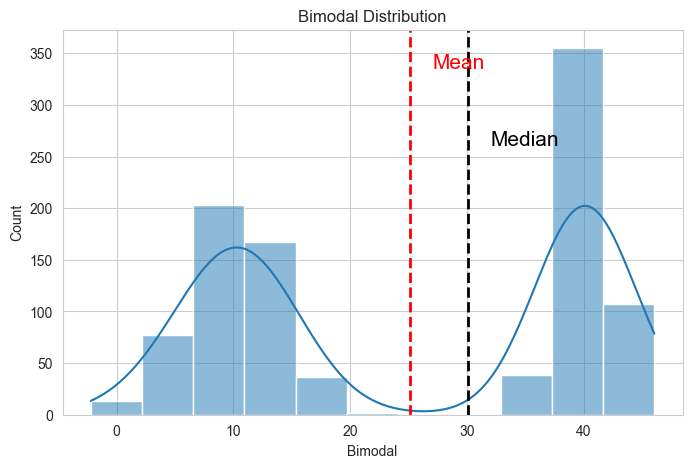

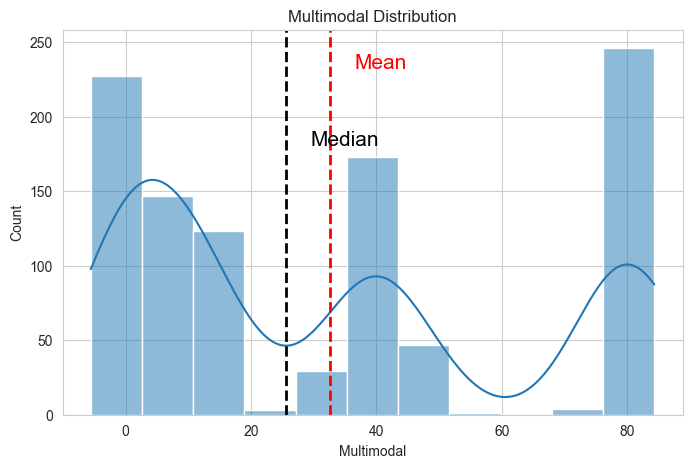

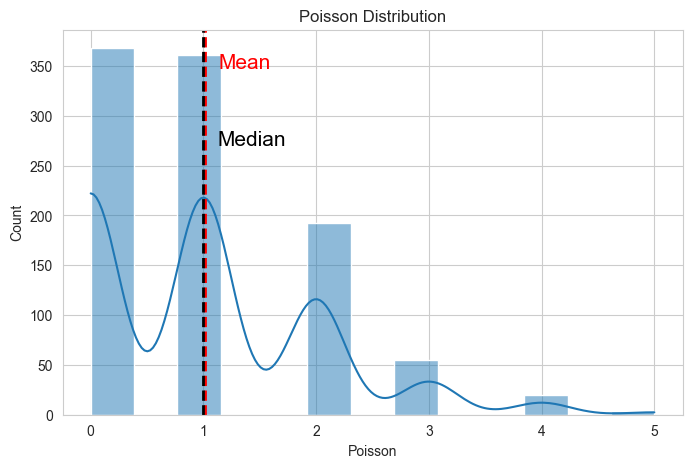

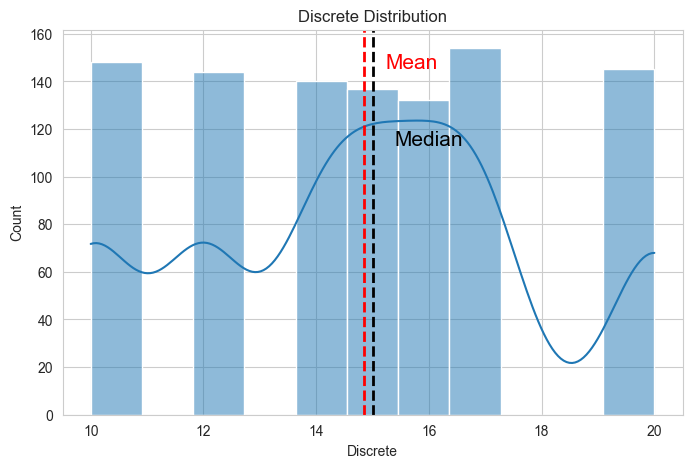

In [11]:
""" Plot the distributions of each column with Mean and Median """
for col in df.columns:

    fig, axes = plt.subplots(figsize=(8,5))
    plt.title(f"{col} Distribution")
    sns.histplot(data=df, x=col, kde=True)

    # Create a red dashed vertical line at the mean value
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

    # Create a black dashed vertical line at the median value
    plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

plt.show()
print("\n")

# Mode
The **mode** is the most frequent value in a dataset.
* __One mode__ → uni-modal
* __Two modes__ → bi-modal
* __More than two__ → multi-modal
* In Pandas, use `.mode()` to find it.
* A dataset can have multiple modes, meaning several values occur most often.

In [12]:
df.mode()

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-0.471,0.255,-0.584,0.310,0.614,12.902,-2.206,0.0,17.0
1,0.015,0.344,-0.486,0.678,0.870,41.349,-2.179,NaN,NaN
2,0.149,0.345,-0.201,0.899,NaN,NaN,1.431,NaN,NaN
3,1.570,0.449,-0.194,3.097,NaN,NaN,3.297,NaN,NaN
4,NaN,0.646,NaN,4.246,NaN,NaN,42.276,NaN,NaN
5,NaN,0.902,NaN,5.512,NaN,NaN,44.701,NaN,NaN
6,NaN,1.652,NaN,5.532,NaN,NaN,79.797,NaN,NaN
7,NaN,NaN,NaN,5.662,NaN,NaN,81.860,NaN,NaN
8,NaN,NaN,NaN,6.797,NaN,NaN,81.867,NaN,NaN
9,NaN,NaN,NaN,7.350,NaN,NaN,NaN,NaN,NaN


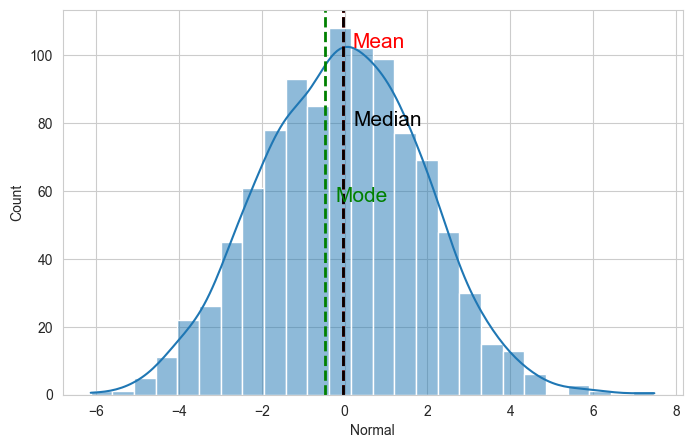

In [13]:
""" Plot the distribution of the Normal column with Mean, Median, and Mode """
col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

# Create a red dashed vertical line at the mean value
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

# Create a black dashed vertical line at the median value
plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

# Create a green dashed vertical line at the mode value
plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

plt.show()

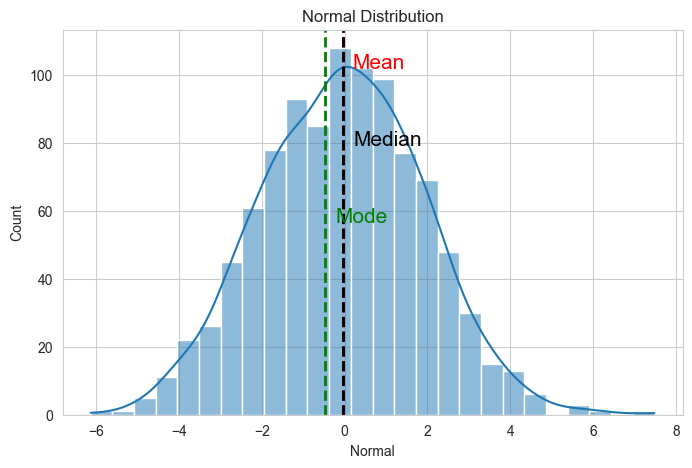

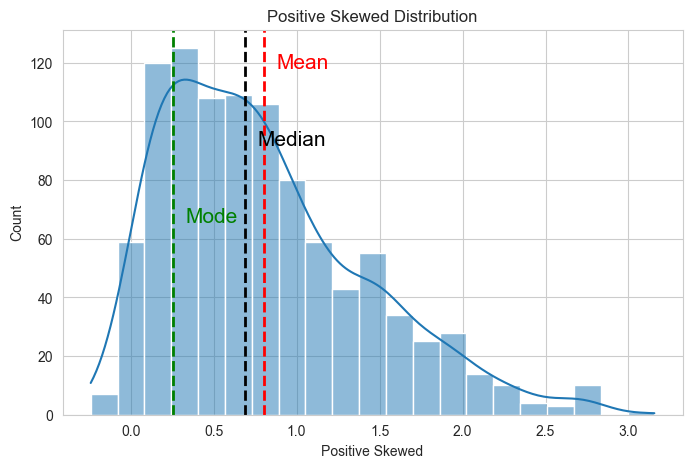

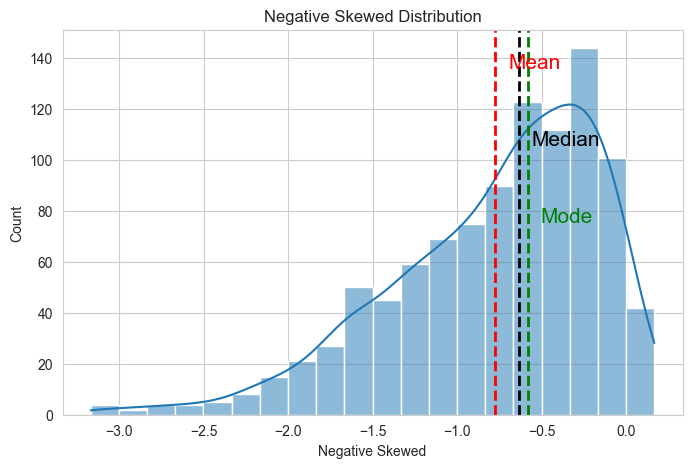

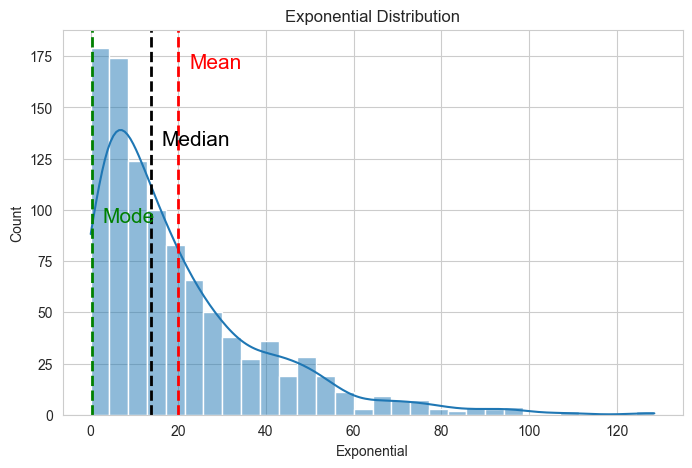

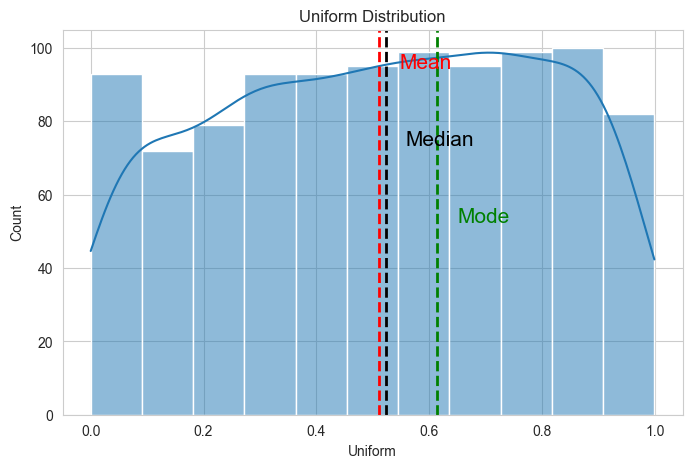

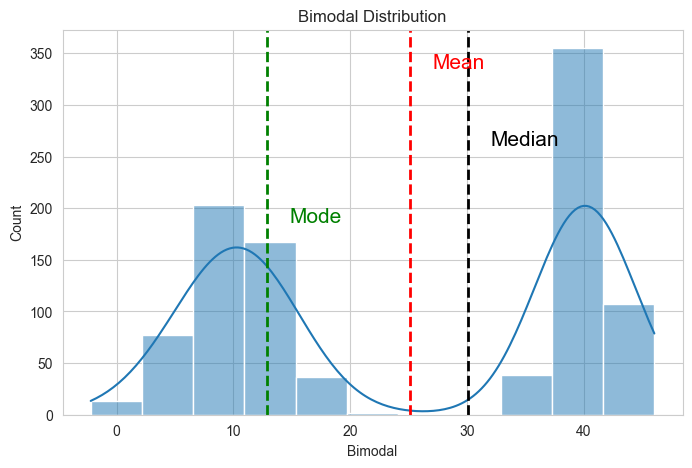

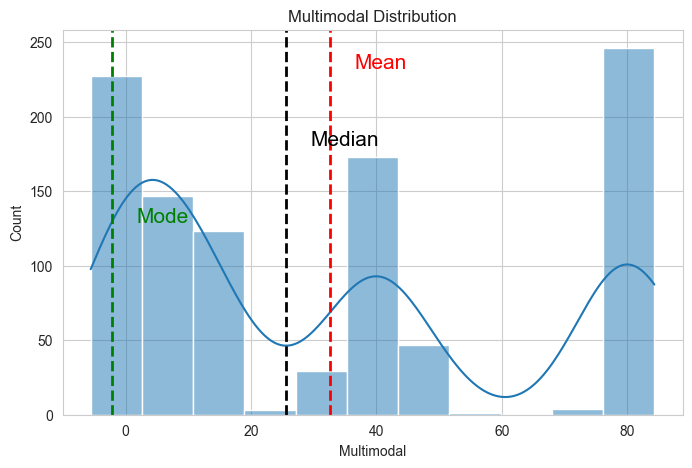

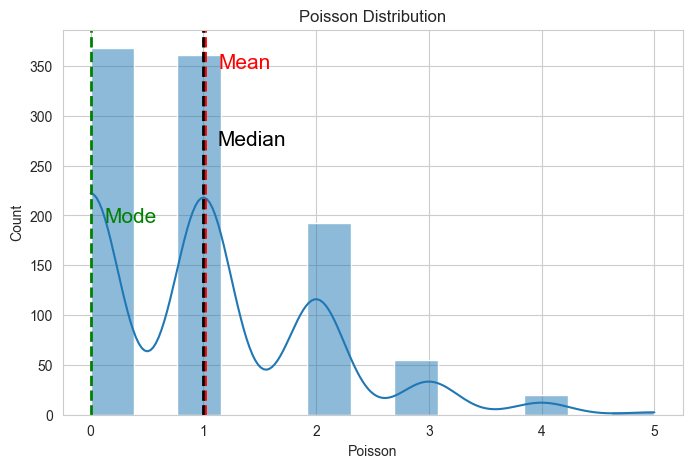

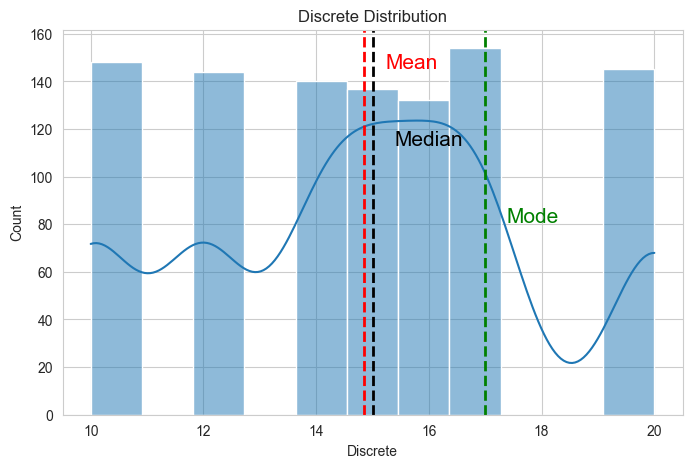

In [14]:
""" Plot the distributions of each column with Mean, Median, and Mode """
for col in df.columns:

    fig, axes = plt.subplots(figsize=(8,5))
    plt.title(f"{col} Distribution")
    sns.histplot(data=df, x=col, kde=True)

    # Create a red dashed vertical line at the mean value
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

    # Create a black dashed vertical line at the median value
    plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

    # Create a green dashed vertical line at the mode value
    plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

plt.show()
print("\n")

In [ ]:
""" Practice with real-world datasets from seaborn """ 
dataset = 'mpg'  # 'penguins' 'iris' ,  'tips'  , 'mpg' , 'diamonds'
df_practice = (sns.load_dataset(dataset)
               .sample(n=200, random_state=1)
               .select_dtypes(exclude=['object', 'category']  
                              # for some reason seaborn datasets sometimes come with
                              # variables' type marked as category
                              # instead of object.
                              ))
print(df_practice.shape)
df_practice.head()

(200, 7)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
174,18.0,6,171.0,97.0,2984,14.5,75
359,28.1,4,141.0,80.0,3230,20.4,81
250,19.4,8,318.0,140.0,3735,13.2,78
274,20.3,5,131.0,103.0,2830,15.9,78
283,20.2,6,232.0,90.0,3265,18.2,79


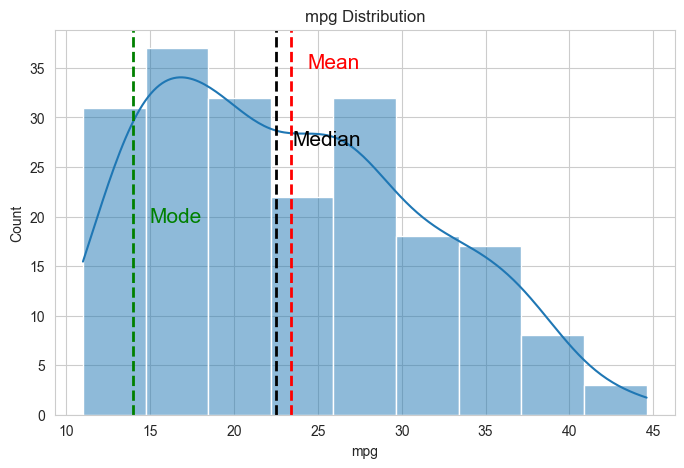

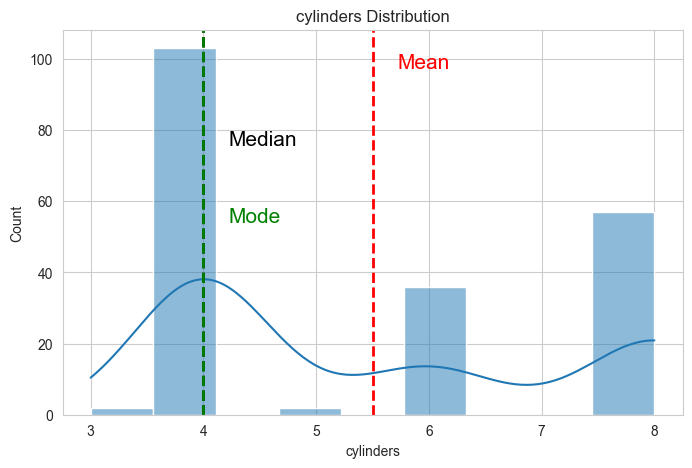

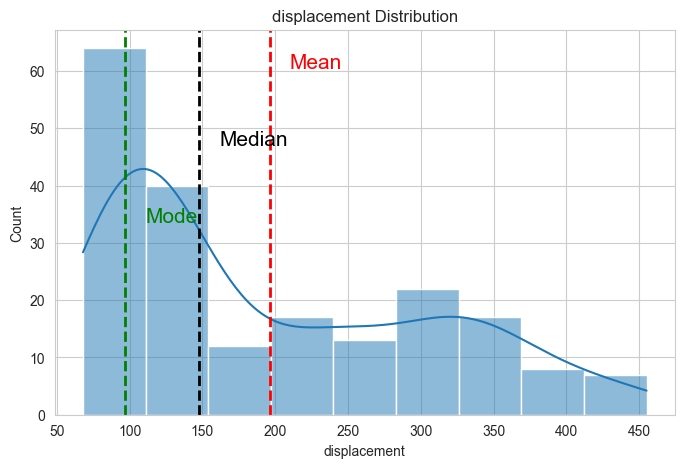

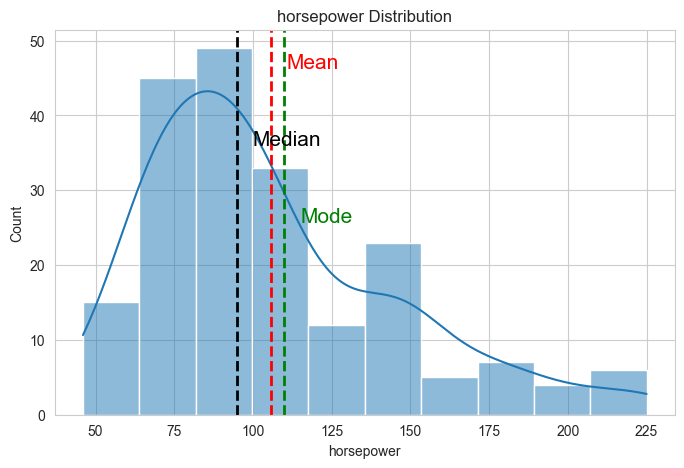

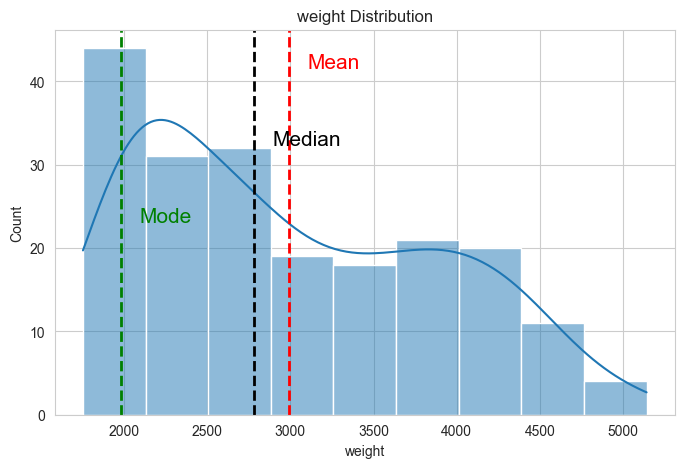

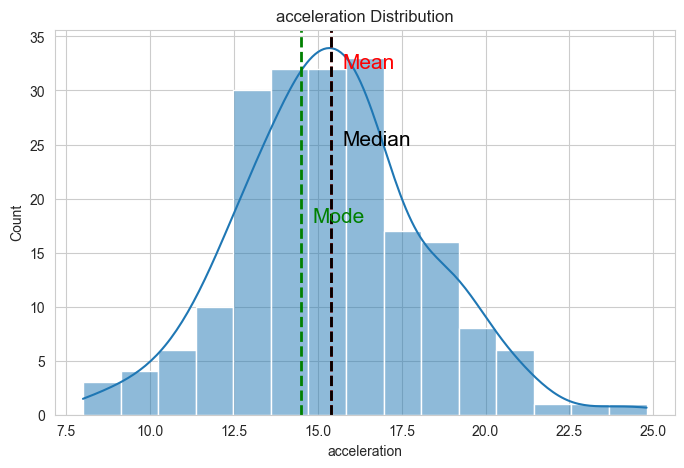

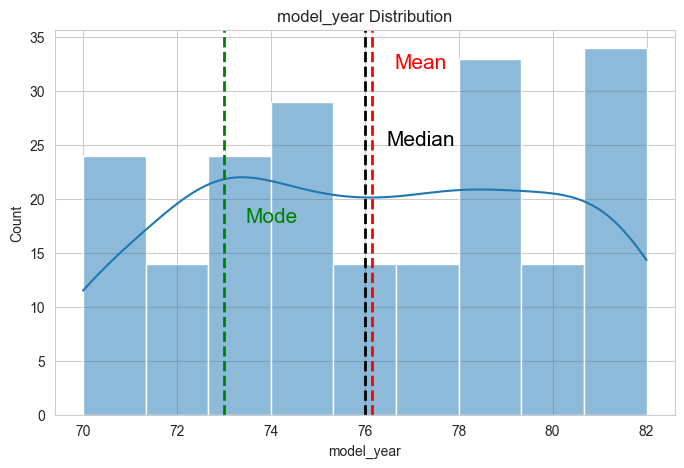

In [16]:
""" Plot the distributions of each column with Mean, Median, and Mode """
for col in df_practice.columns:
    
    fig, axes = plt.subplots(figsize=(8,5))
    plt.title(f"{col} Distribution")
    sns.histplot(data=df_practice, x=col, kde=True)

    # Create a red dashed vertical line at the mean value
    plt.axvline(df_practice[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df_practice[col].mean() + df_practice[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

    # Create a black dashed vertical line at the median value
    plt.axvline(df_practice[col].median(), color='k', linestyle='dashed', linewidth=2)
    plt.text(x=df_practice[col].median() + df_practice[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

    # Create a green dashed vertical line at the mode value
    plt.axvline(df_practice[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
    plt.text(x=df_practice[col].mode()[0] + df_practice[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

    plt.show()
    print("\n")